Name: shaik jameer

TECHNOHACKS EDUTECH INTERNSHIP TASK 2

# Social media sentiment analysis

Useing a dataset of tweets or Facebook posts and
perform sentiment analysis to determine the
overall sentiment of the posts.

# Steps

1.Importing requried libraries                                                                                      
2.Loading of dataset                                                                                                       
3.Display Summary Statistics                                                                        
4.Data Visualization                                                                                                       
5.Data Modelling                                                                                                                 
6.Prediction of species              

Importing requried libraries

In [1]:
import pandas as pd
import numpy as np
# %load_ext nb_black 

# library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")


# import Regex, string and unicodedata.
import re, string, unicodedata                          

import contractions                                     

# import BeautifulSoup.
from bs4 import BeautifulSoup                           

# import Natural Language Tool-Kit.
import nltk                                            

# download Stopwords.
nltk.download('stopwords')                              
nltk.download('punkt')
nltk.download('wordnet')

# import stopwords.
from nltk.corpus import stopwords                       

# import Tokenizer.
from nltk.tokenize import word_tokenize, sent_tokenize  

# library to split data
from sklearn.model_selection import train_test_split, StratifiedKFold

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# import wordcloud
import wordcloud
from wordcloud import STOPWORDS
from wordcloud import WordCloud

# remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# set the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to get diferent metric scores
from sklearn.metrics import (
    recall_score,
    accuracy_score,
    confusion_matrix,classification_report,
    f1_score,
    precision_score,
    precision_recall_fscore_support
)

# import vectorizers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# import rfc and cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# import word prepocessors
from nltk.tokenize import word_tokenize 
from nltk.stem import LancasterStemmer, WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading of dataset

In [2]:
df = pd.read_csv("C:/Users/satya/Downloads/Tweets.csv")

In [3]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [4]:
texts = [[word.lower() for word in text.split()] for text in df]

In [5]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

Display Summary Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Data Visualization

<Axes: >

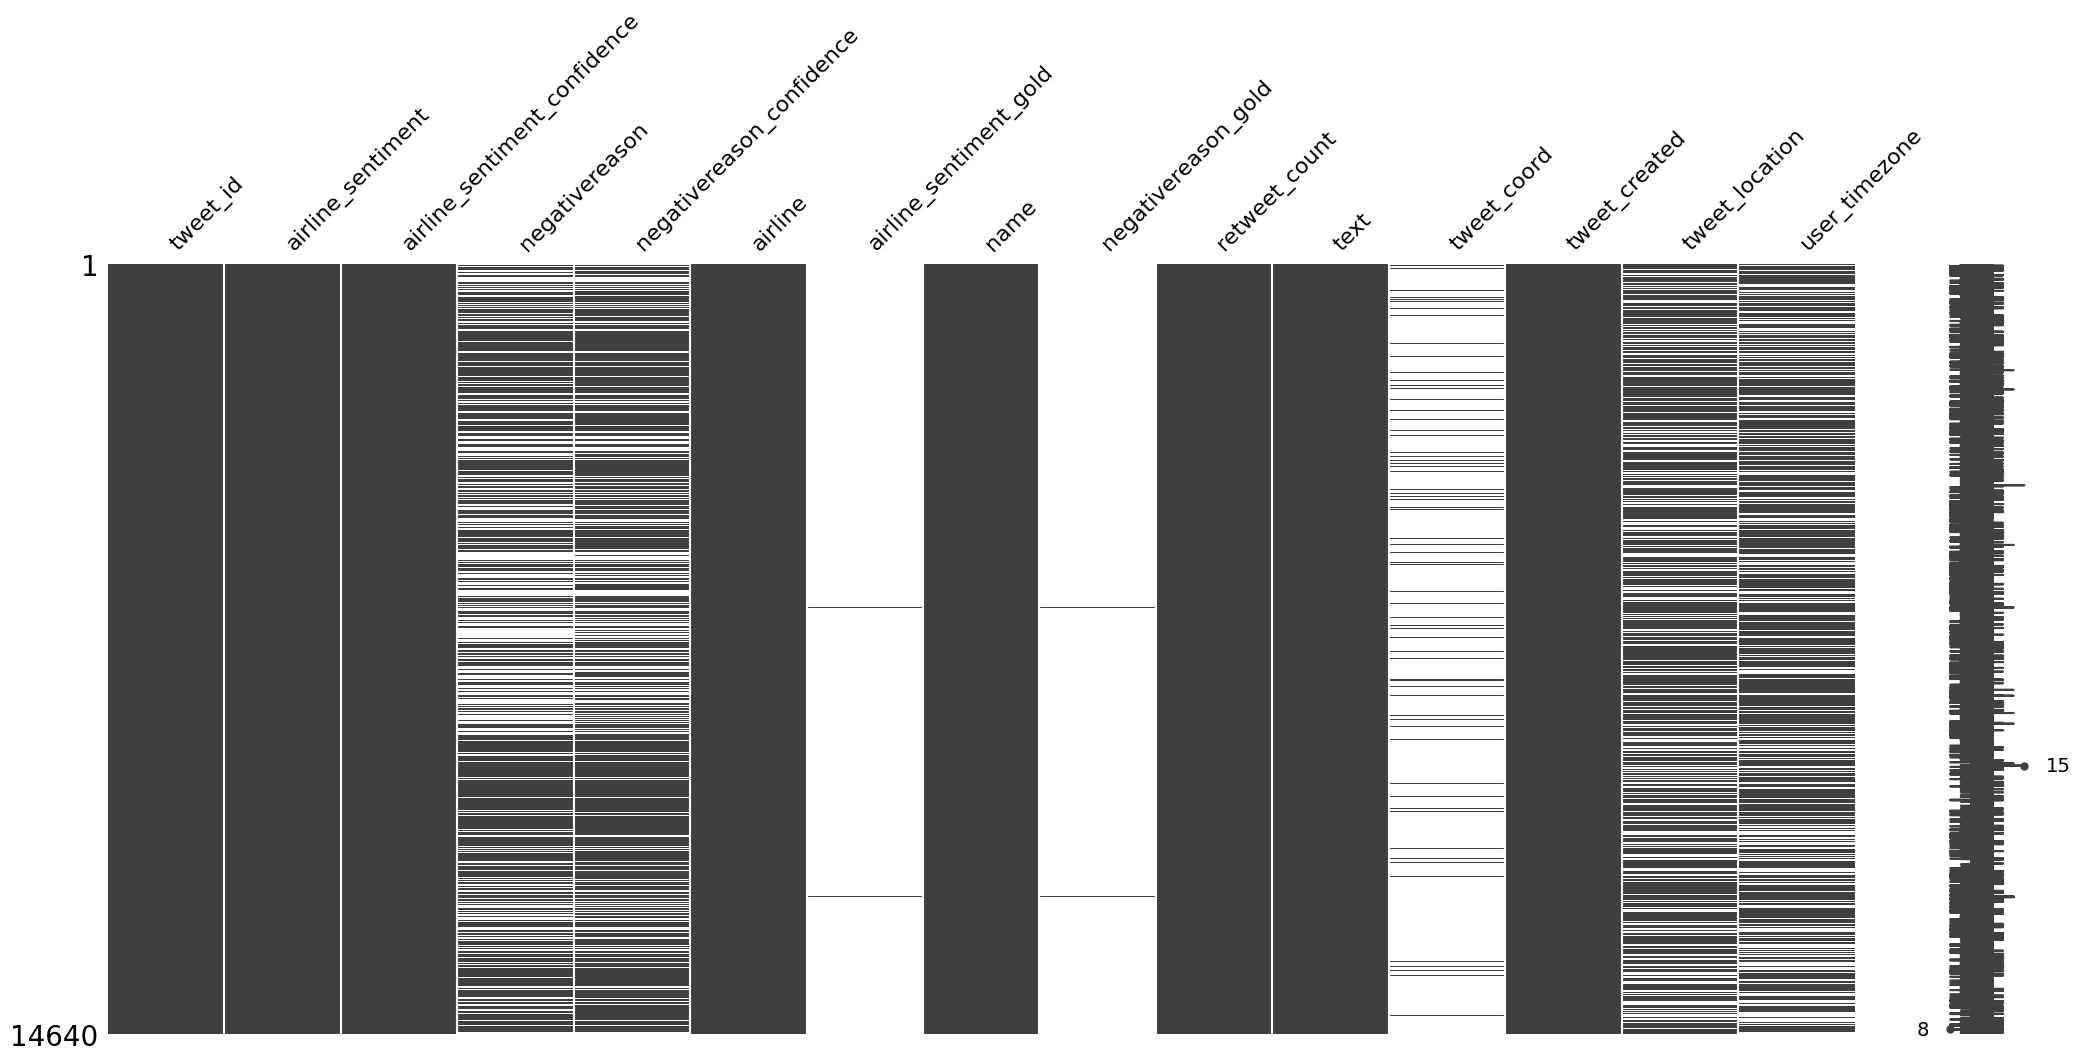

In [8]:
msno.matrix(df)

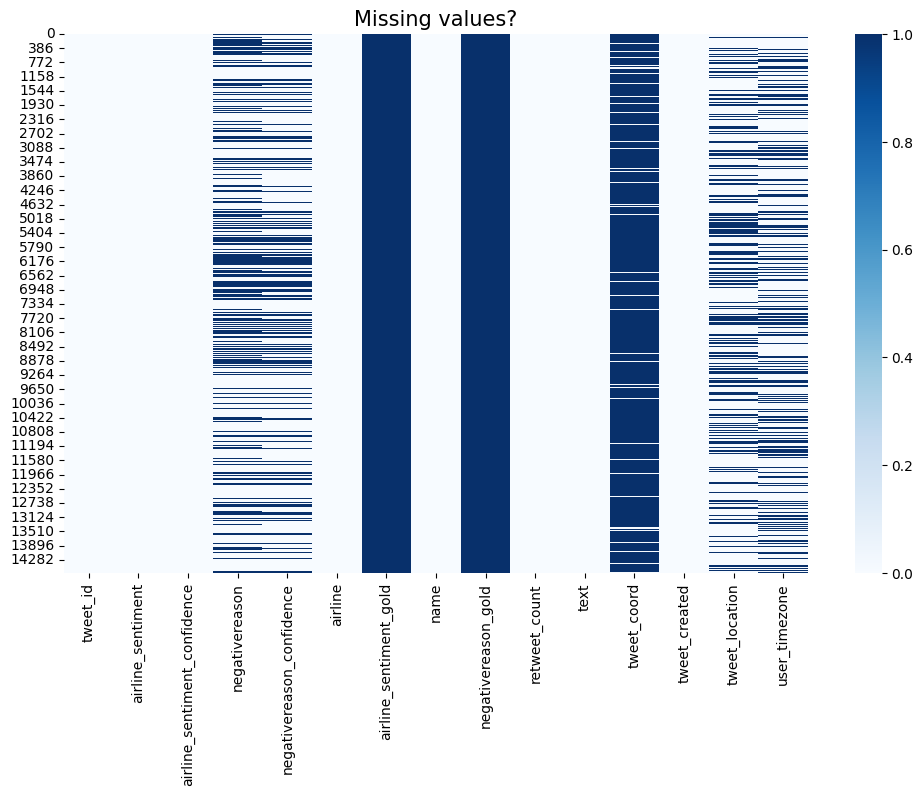

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(), cmap = "Blues")                       #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

In [10]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [11]:
del df["tweet_coord"]
del df["airline_sentiment_gold"]
del df["negativereason_gold"]

In [12]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [13]:
freq = df.groupby("negativereason").size()

In [14]:
# Checking duplicates
df.duplicated().sum()

39

In [15]:
# Dropping duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [16]:
df.sample(n = 10)

tweet_id airline_sentiment  airline_sentiment_confidence  \
4704   569918484726964224          negative                        1.0000   
2588   569017218316369921           neutral                        0.6813   
2693   568952850908213248          negative                        1.0000   
11401  568139693574848513          negative                        1.0000   
12871  569995335893848064           neutral                        0.6390   
14268  569643921543958530           neutral                        1.0000   
7310   569672563506458624          positive                        1.0000   
14015  569677513539981313          negative                        1.0000   
7713   569318653792948226          negative                        1.0000   
1624   569641615721140224          negative                        1.0000   

               negativereason  negativereason_confidence     airline  \
4704             Lost Luggage                     1.0000   Southwest   
2588                      NaN                     0.0000      United   
2693   Customer Service Issue                     1.0000      United   
11401  Customer Service Issue                     0.6989  US Airways   
12871                     NaN                        NaN    American   
14268                     NaN                        NaN    American   
7310                      NaN                        NaN       Delta   
14015             Late Flight                     0.3395    American   
7713              Late Flight                     0.6809       Delta   
1624   Customer Service Issue                     1.0000      United   

                name  retweet_count  \
4704    karasellswyo              0   
2588   iamlaurencard              0   
2693    RONISREALTOR              1   
11401     BigDavew2k              0   
12871   scottfmurphy              0   
14268  KiraMercedes_              0   
7310        nooshies              0   
14015     KingFilson              0   
7713       AndrewATZ              0   
1624        rikrik__              0   

                                                    text  \
4704   @SouthwestAir My bags are on the way to Chicag...   
2588   .@united I took a screenshot and emailed it to...   
2693   @united again HORRIBLE service, again attitude...   
11401  @USAirways I asked for some reimbursement some...   
12871          @AmericanAir boom. http://t.co/PzGc6Jch7n   
14268  @AmericanAir what name and department does it ...   
7310                      @JetBlue you're still the best   
14015  @AmericanAir you Cancelled Flightled my wife's...   
7713   @JetBlue Flight 2202 out of JFK, 2 &amp; 1/2 h...   
1624   “@united: @rikrik__ What made you come to this...   

                   tweet_created       tweet_location  \
4704   2015-02-23 09:55:29 -0800                  NaN   
2588   2015-02-20 22:14:11 -0800      Aliso Viejo, CA   
2693   2015-02-20 17:58:24 -0800  Fort Lauderdale, FL   
11401  2015-02-18 12:07:13 -0800                  NaN   
12871  2015-02-23 15:00:52 -0800         New York, NY   
14268  2015-02-22 15:44:29 -0800                  NaN   
7310   2015-02-22 17:38:17 -0800           Boston, MA   
14015  2015-02-22 17:57:57 -0800                  NaN   
7713   2015-02-21 18:11:59 -0800    New York City, NY   
1624   2015-02-22 15:35:19 -0800          Saint Louis   

                    user_timezone  
4704                          NaN  
2588   Pacific Time (US & Canada)  
2693   Eastern Time (US & Canada)  
11401                         NaN  
12871  Central Time (US & Canada)  
14268                      London  
7310   Eastern Time (US & Canada)  
14015  Central Time (US & Canada)  
7713                        Quito  
1624   Central Time (US & Canada)

In [17]:
df.describe().T

count          mean           std  \
tweet_id                      14601.0  5.692156e+17  7.782706e+14   
airline_sentiment_confidence  14601.0  8.999022e-01  1.629654e-01   
negativereason_confidence     10501.0  6.375749e-01  3.303735e-01   
retweet_count                 14601.0  8.280255e-02  7.467231e-01   

                                       min           25%           50%  \
tweet_id                      5.675883e+17  5.685581e+17  5.694720e+17   
airline_sentiment_confidence  3.350000e-01  6.923000e-01  1.000000e+00   
negativereason_confidence     0.000000e+00  3.605000e-01  6.705000e-01   
retweet_count                 0.000000e+00  0.000000e+00  0.000000e+00   

                                       75%           max  
tweet_id                      5.698884e+17  5.703106e+17  
airline_sentiment_confidence  1.000000e+00  1.000000e+00  
negativereason_confidence     1.000000e+00  1.000000e+00  
retweet_count                 0.000000e+00  4.400000e+01

In [18]:
df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
name                             7701
retweet_count                      18
text                            14427
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

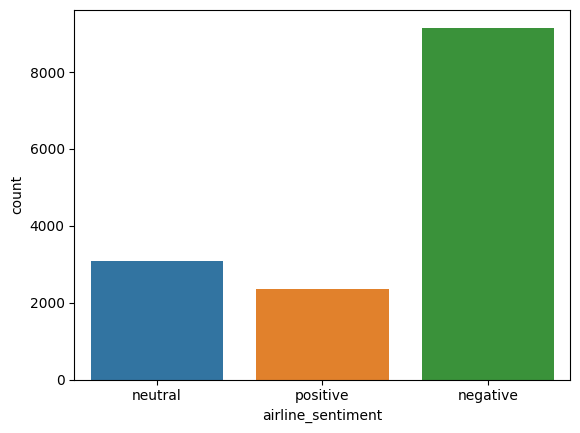

In [19]:
ax = sns.countplot(x = "airline_sentiment", data = df)

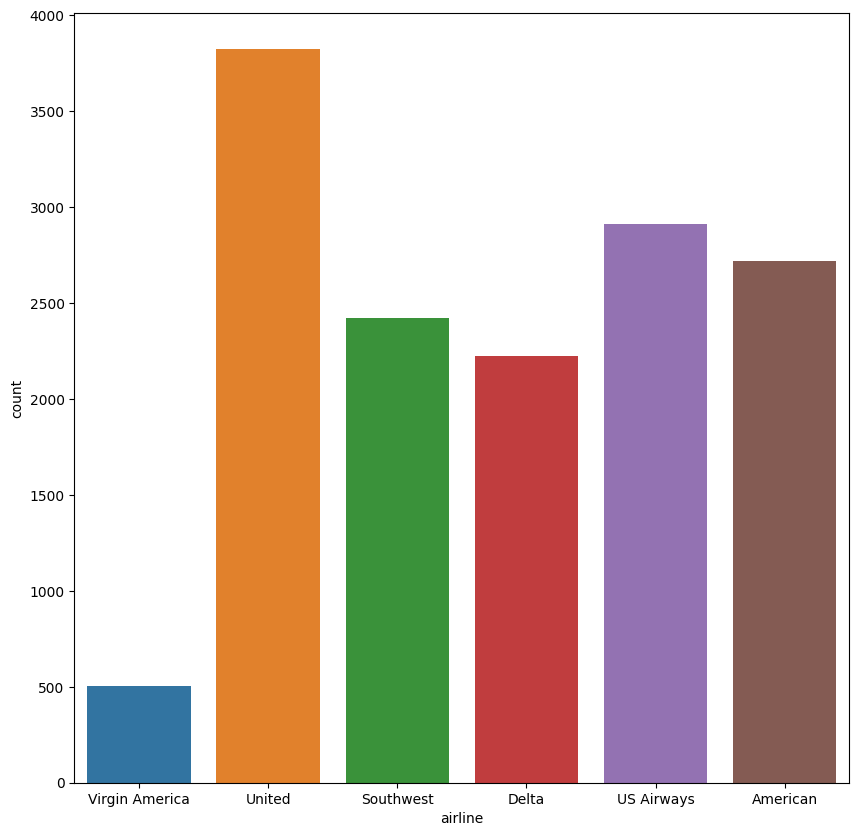

In [20]:
plt.figure(figsize = (10, 10))
ax = sns.countplot(x = "airline", data = df)

In [21]:
import plotly.graph_objects as go
crosstab_sentiments=pd.crosstab(df.airline, df.airline_sentiment)
companies=list(crosstab_sentiments.index)

fig = go.Figure(data=[
    go.Bar(name=col_name, x=companies, y=list(crosstab_sentiments[col_name]))
for col_name in list(crosstab_sentiments.columns)])
# Change the bar mode
fig.update_layout(barmode='stack',
                  title='Sentiment distribution per company',
                  yaxis=dict(title='Sentiment distribution'),
                 xaxis=dict(title='Companies'))
fig.show()

In [22]:
crosstab_neg_reasons = pd.crosstab(df["airline"], df["negativereason"])
companies = list(crosstab_neg_reasons.index)

fig = go.Figure(data = [
    go.Bar(name = col_name, x = companies, y = list(crosstab_neg_reasons[col_name]))
for col_name in list(crosstab_neg_reasons.columns)])

fig.update_layout(barmode = "stack",
                 title = "Negative Reasons Distribution per Company",
                 yaxis = dict(title = "Negative reasons Distribution"),
                 xaxis = dict(title = "Companies"))
fig.show()

In [23]:
labels = list(crosstab_neg_reasons.columns)
values = [crosstab_neg_reasons[col_name].sum() for col_name in labels]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title='Overall distribution for negative reasons')
fig.show()

In [24]:
df.drop(df.loc[df["airline_sentiment"] == "neutral"].index, inplace = True)

In [25]:
data = df[
    ["airline_sentiment", "text"]
]
data.head()


airline_sentiment                                               text
1          positive  @VirginAmerica plus you've added commercials t...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...
5          negative  @VirginAmerica seriously would pay $30 a fligh...
6          positive  @VirginAmerica yes, nearly every time I fly VX...

Data Modelling

In [26]:
X = df["text"]
y = df["airline_sentiment"]

In [27]:
X

1        @VirginAmerica plus you've added commercials t...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
6        @VirginAmerica yes, nearly every time I fly VX...
                               ...                        
14633    @AmericanAir my flight was Cancelled Flightled...
14634           @AmericanAir right on cue with the delays👌
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14638    @AmericanAir you have my money, you change my ...
Name: text, Length: 11510, dtype: object

In [28]:
y

1        positive
3        negative
4        negative
5        negative
6        positive
           ...   
14633    negative
14634    negative
14635    positive
14636    negative
14638    negative
Name: airline_sentiment, Length: 11510, dtype: object

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9208,) (2302,) (9208,) (2302,)


In [30]:
tfidf = TfidfVectorizer(stop_words="english")
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [31]:
print(tfidf.get_feature_names_out())

['00' '000' '000ft' ... 'zv6cfpohl5' 'zvfmxnuelj' 'zzps5ywve2']


In [32]:
print(tfidf.vocabulary_)

{'jetblue': 5633, 'did': 3478, 'idea': 5246, 'offered': 7007, 'pay': 7303, 'tix': 9682, 'airport': 1441, 'bc': 1996, 'told': 9717, 'reservation': 8178, 'didn': 3479, '2275': 394, 'pp': 7562, 'united': 10134, 'guys': 4880, 'suck': 9273, 'respond': 8195, 'friend': 4543, 'lisapal': 6047, 'directly': 3509, 'southwestair': 8993, 'prove': 7740, 'cuz': 3226, 'southwest': 8992, 'people': 7334, 'don': 3654, 'know': 5828, 'schedule': 8525, 'ticket': 9644, 'issued': 5545, 'whilst': 10610, 'delivering': 3377, 'customers': 3210, 'usairways': 10266, 'pilot': 7421, 'flight': 4354, '729': 997, 'departure': 3405, 'amp': 1545, 'broken': 2303, 'computer': 2933, 'time': 9662, 'flying': 4428, 'alwayslate': 1510, 'americanair': 1528, 'point': 7507, 'pic': 7404, 'reps': 8152, 'struggle': 9231, 'merger': 6438, 'imagine': 5284, 'public': 7765, 'http': 5190, 'hqdb5iruvg': 5181, 'thanks': 9552, 'dm': 3619, 'rescheduling': 8171, 'unfortunately': 10121, 'operations': 7076, 'process': 7682, 'lax': 5921, 'chaos': 26

In [33]:
data[data["airline_sentiment"] == "negative"]["text"]

3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
15           @VirginAmerica SFO-PDX schedule is still MIA.
17       @VirginAmerica  I flew from NYC to SFO last we...
                               ...                        
14631    @AmericanAir thx for nothing on getting us out...
14633    @AmericanAir my flight was Cancelled Flightled...
14634           @AmericanAir right on cue with the delays👌
14636    @AmericanAir leaving over 20 minutes Late Flig...
14638    @AmericanAir you have my money, you change my ...
Name: text, Length: 9157, dtype: object

In [34]:
count_vect = CountVectorizer(stop_words="english")
neg_matrix = count_vect.fit_transform(data[data["airline_sentiment"]=="negative"]["text"])
freqs = zip(count_vect.get_feature_names_out(), neg_matrix.sum(axis=0).tolist()[0])
# Sort from largest to smallest
print(sorted(freqs, key=lambda x: -x[1])[:100])

[('flight', 2937), ('united', 2899), ('usairways', 2375), ('americanair', 2089), ('southwestair', 1214), ('jetblue', 1051), ('cancelled', 921), ('service', 746), ('hours', 646), ('just', 622), ('help', 618), ('hold', 611), ('customer', 609), ('time', 596), ('plane', 530), ('delayed', 505), ('amp', 503), ('hour', 452), ('flightled', 445), ('http', 436), ('flights', 419), ('bag', 415), ('gate', 410), ('ve', 398), ('don', 388), ('late', 377), ('need', 373), ('phone', 367), ('waiting', 341), ('thanks', 315), ('got', 298), ('airline', 294), ('like', 291), ('trying', 288), ('delay', 272), ('wait', 272), ('today', 269), ('minutes', 266), ('day', 251), ('going', 249), ('bags', 245), ('luggage', 245), ('told', 245), ('airport', 244), ('people', 242), ('worst', 241), ('fly', 237), ('really', 236), ('did', 227), ('guys', 224), ('weather', 224), ('lost', 221), ('agent', 218), ('hrs', 217), ('way', 212), ('make', 211), ('change', 210), ('seat', 208), ('flighted', 205), ('want', 205), ('check', 204)

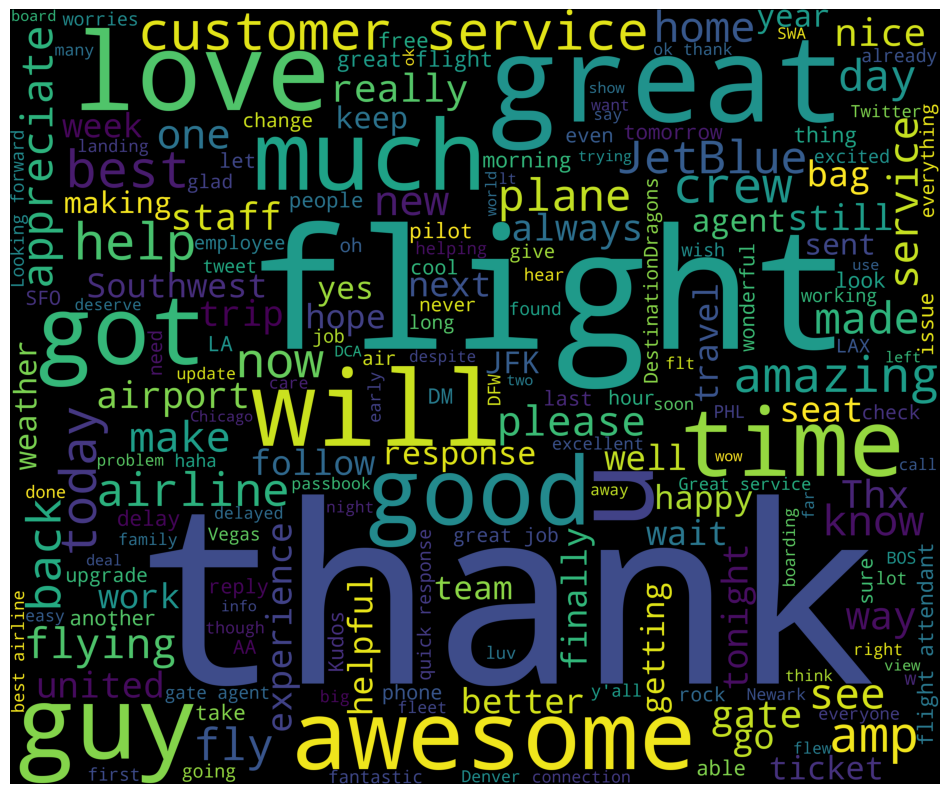

In [35]:
new_df = data[data["airline_sentiment"] == "positive"]
words = " ".join(new_df["text"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "black", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

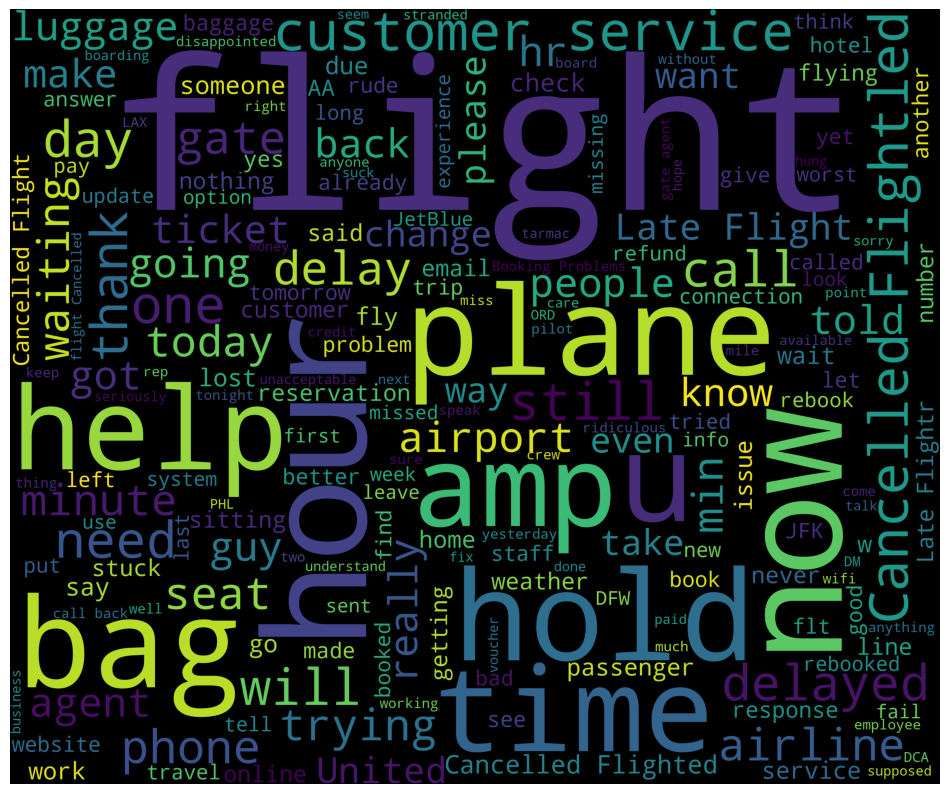

In [36]:
new_df = data[data["airline_sentiment"] == "negative"]
words = " ".join(new_df["text"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "black", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [37]:
data.drop(data.loc[data["airline_sentiment"] == "neutral"].index, inplace = True)

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(data["airline_sentiment"])
data["airline_sentiment_encoded"] = le.transform(data["airline_sentiment"])
data.head()

airline_sentiment                                               text  \
1          positive  @VirginAmerica plus you've added commercials t...   
3          negative  @VirginAmerica it's really aggressive to blast...   
4          negative  @VirginAmerica and it's a really big bad thing...   
5          negative  @VirginAmerica seriously would pay $30 a fligh...   
6          positive  @VirginAmerica yes, nearly every time I fly VX...   

   airline_sentiment_encoded  
1                          1  
3                          0  
4                          0  
5                          0  
6                          1

In [39]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ", tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return(" ".join( meaningful_words ))

In [40]:
nltk.download("stopwords")
data["clean_tweet"] = data["text"].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11510 entries, 1 to 14638
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   airline_sentiment          11510 non-null  object
 1   text                       11510 non-null  object
 2   airline_sentiment_encoded  11510 non-null  int32 
 3   clean_tweet                11510 non-null  object
dtypes: int32(1), object(3)
memory usage: 404.6+ KB


In [42]:
X = data["clean_tweet"]
y = data["airline_sentiment"]

In [43]:
print(X.shape, y.shape)

(11510,) (11510,)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8632,) (2878,) (8632,) (2878,)


In [45]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [46]:
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

In [47]:
vect_tunned = CountVectorizer(stop_words = "english", ngram_range = (1, 2), min_df = 0.1, max_df = 0.7, max_features = 100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

Prediction of species

In [48]:
from sklearn.svm import SVC
model = SVC(kernel = "linear", random_state = 10)
model.fit(X_train_dtm, y_train)
pred = model.predict(X_test_dtm)

In [49]:
print("Accuracy Score: ", accuracy_score(y_test, pred) * 100)

Accuracy Score:  90.7574704656011


In [50]:
print("Confusion Matrix\n\n", confusion_matrix(y_test, pred))

Confusion Matrix

 [[2179  122]
 [ 144  433]]


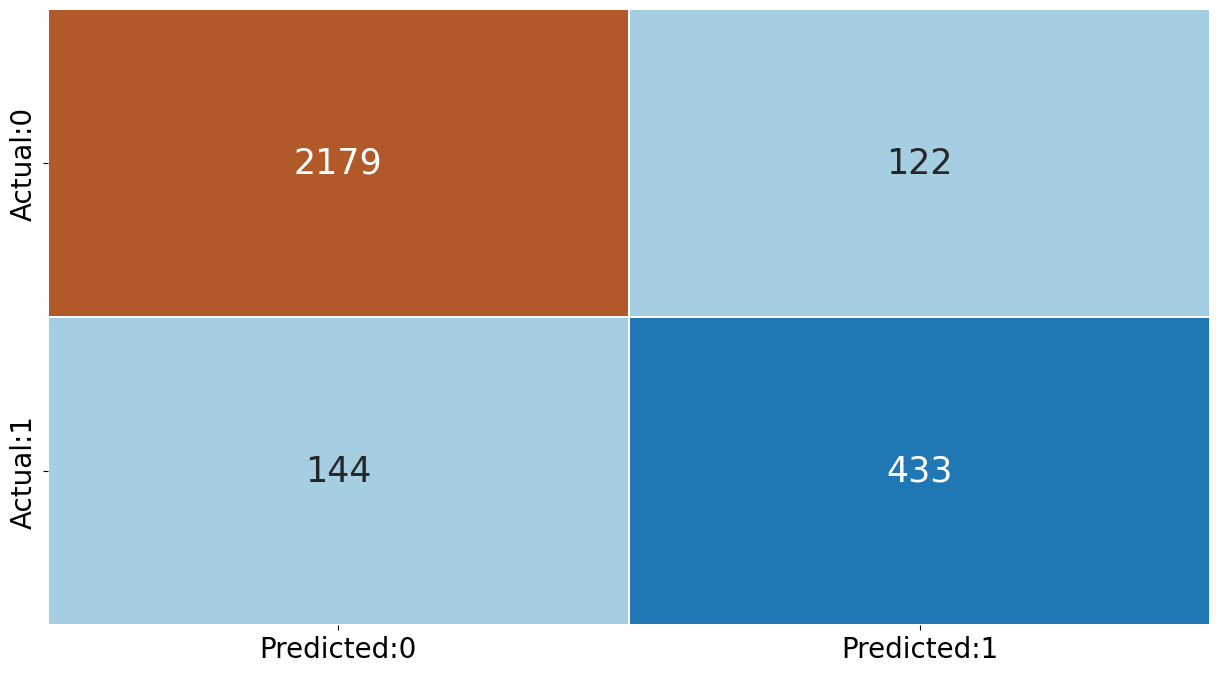

In [51]:
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test, pred),columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [52]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.94      0.95      0.94      2301
    positive       0.78      0.75      0.77       577

    accuracy                           0.91      2878
   macro avg       0.86      0.85      0.85      2878
weighted avg       0.91      0.91      0.91      2878



THANK YOU!!!